In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

In [2]:
df = pd.read_csv('Customer Churn.csv')

In [5]:
display(df.head(3500))

,ID,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Plan,Status,Age,Customer Value,Churn
0,1,3,no,10,2,1603,25,32,11,3,pre-paid,active,30,193.120,no
1,2,8,no,37,0,4255,65,0,13,2,pre-paid,active,25,194.400,yes
2,3,0,no,38,0,0,0,0,0,2,pre-paid,not-active,25,0.000,yes
3,4,10,no,36,0,2338,54,327,20,2,pre-paid,active,25,1579.140,yes
4,5,10,no,37,0,4083,60,0,31,1,pre-paid,active,15,227.865,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,3146,0,no,16,0,1200,19,12,9,2,pre-paid,active,25,108.855,yes
3146,3147,9,no,15,0,5897,134,69,37,1,post-paid,active,15,711.205,yes
3147,3148,5,no,13,0,8437,164,57,35,4,pre-paid,active,45,357.525,yes
3148,3149,1,no,14,2,2357,38,15,14,3,pre-paid,active,30,155.800,yes


In [7]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3150 non-null   int64  
 1   Call Failure             3150 non-null   int64  
 2   Complains                3150 non-null   object 
 3   Subscription Length      3150 non-null   int64  
 4   Charge Amount            3150 non-null   int64  
 5   Seconds of Use           3150 non-null   int64  
 6   Freq. of use             3150 non-null   int64  
 7   Freq. of SMS             3150 non-null   int64  
 8   Distinct Called Numbers  3150 non-null   int64  
 9   Age Group                3150 non-null   int64  
 10  Plan                     3150 non-null   object 
 11  Status                   3150 non-null   object 
 12  Age                      3150 non-null   int64  
 13  Customer Value           3150 non-null   float64
 14  Churn                   

None

In [3]:
complainsDF=pd.get_dummies(df.Complains,prefix='Complains')
planDF=pd.get_dummies(df.Plan ,prefix='Plan')
statusDF=pd.get_dummies(df.Status, prefix='Status')
churnDF=pd.get_dummies(df.Churn,prefix='Churn')
dfScaledCats = pd.concat([df, complainsDF,planDF,statusDF,churnDF], axis='columns')
display(dfScaledCats.describe())

,ID,Call Failure,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Age,Customer Value,Complains_no,Complains_yes,Plan_post-paid,Plan_pre-paid,Status_active,Status_not-active,Churn_no,Churn_yes
count,3150.000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,1575.500,7.627937,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,30.998413,470.972916,0.923492,0.076508,0.077778,0.922222,0.751746,0.248254,0.157143,0.842857
std,909.471,7.263886,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,8.831095,517.015433,0.265851,0.265851,0.267864,0.267864,0.432069,0.432069,0.363993,0.363993
min,1.000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,788.250,1.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,25.000000,113.801250,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,1575.500,6.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,30.000000,228.480000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,2362.750,12.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,30.000000,788.388750,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3150.000,36.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,55.000000,2165.280000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


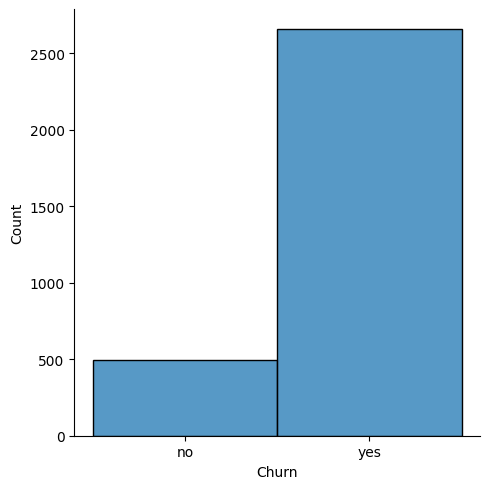

In [15]:
sns.displot(df['Churn'])

[Text(0.5, 0, 'Age Group'), Text(0, 0.5, 'Churn Count')]

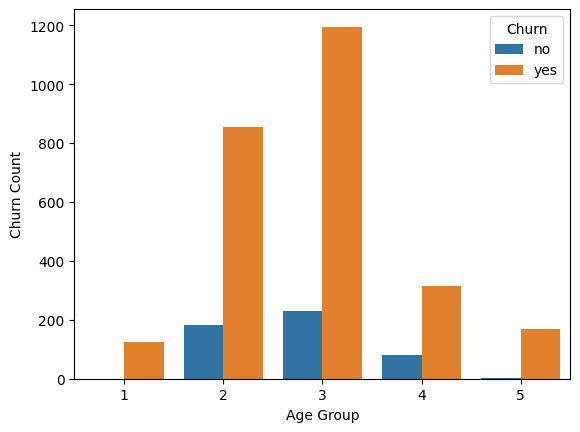

In [54]:
sns.countplot(data=df, x="Age Group", hue="Churn").set(xlabel='Age Group', ylabel='Churn Count')

[Text(0.5, 0, 'Charge Amount'), Text(0, 0.5, 'Churn Count')]

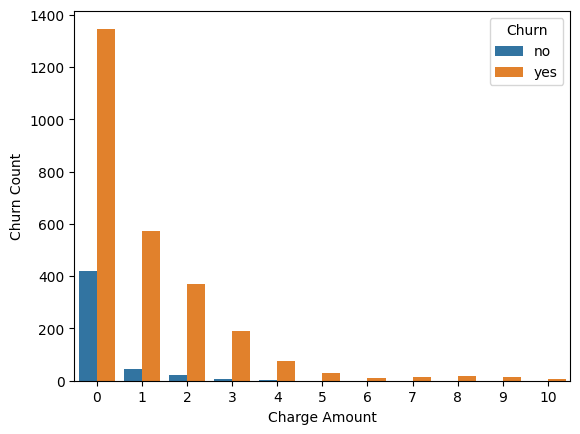

In [56]:
sns.countplot(data=df, x="Charge Amount", hue="Churn").set(xlabel='Charge Amount', ylabel='Churn Count')

[Text(0.5, 0, 'Charge Amount'), Text(0, 0.5, 'Customer Count')]

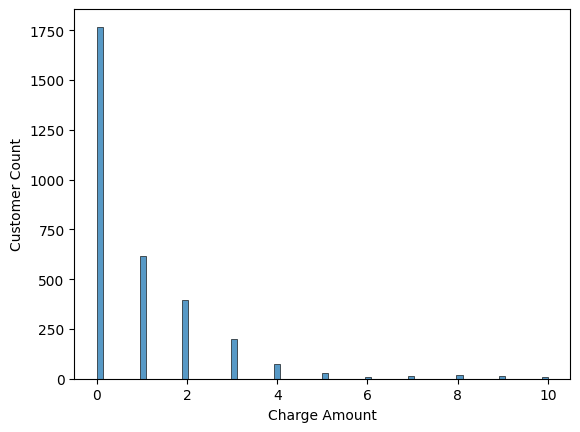

In [9]:
sns.histplot(data=df, x="Charge Amount").set(xlabel='Charge Amount', ylabel='Customer Count')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3150 non-null   int64  
 1   Call Failure             3150 non-null   int64  
 2   Complains                3150 non-null   object 
 3   Subscription Length      3150 non-null   int64  
 4   Charge Amount            3150 non-null   int64  
 5   Seconds of Use           3150 non-null   int64  
 6   Freq. of use             3150 non-null   int64  
 7   Freq. of SMS             3150 non-null   int64  
 8   Distinct Called Numbers  3150 non-null   int64  
 9   Age Group                3150 non-null   int64  
 10  Plan                     3150 non-null   object 
 11  Status                   3150 non-null   object 
 12  Age                      3150 non-null   int64  
 13  Customer Value           3150 non-null   float64
 14  Churn                   

In [4]:
dfScaledCats.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19160\1441392740.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfScaledCats.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19160\1441392740.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  dfScaledCats.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,ID,Call Failure,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Age,Customer Value,Complains_no,Complains_yes,Plan_post-paid,Plan_pre-paid,Status_active,Status_not-active,Churn_no,Churn_yes
ID,1.00,-0.11,-0.05,-0.03,-0.02,-0.02,0.01,-0.00,-0.03,-0.02,0.01,0.00,-0.00,0.01,-0.01,-0.01,0.01,0.00,-0.00
Call Failure,-0.11,1.00,0.17,0.59,0.50,0.57,-0.02,0.50,0.05,0.04,0.12,-0.15,0.15,0.19,-0.19,0.11,-0.11,-0.01,0.01
Subscription Length,-0.05,0.17,1.00,0.08,0.12,0.11,0.08,0.09,0.02,-0.00,0.11,0.02,-0.02,-0.16,0.16,-0.14,0.14,-0.03,0.03
Charge Amount,-0.03,0.59,0.08,1.00,0.45,0.38,0.09,0.42,0.28,0.28,0.17,0.03,-0.03,0.32,-0.32,0.36,-0.36,-0.20,0.20
Seconds of Use,-0.02,0.50,0.12,0.45,1.00,0.95,0.10,0.68,0.02,0.02,0.42,0.10,-0.10,0.13,-0.13,0.46,-0.46,-0.30,0.30
Freq. of use,-0.02,0.57,0.11,0.38,0.95,1.00,0.10,0.74,-0.03,-0.03,0.40,0.09,-0.09,0.21,-0.21,0.45,-0.45,-0.30,0.30
Freq. of SMS,0.01,-0.02,0.08,0.09,0.10,0.10,1.00,0.08,-0.05,-0.09,0.92,0.11,-0.11,0.20,-0.20,0.30,-0.30,-0.22,0.22
Distinct Called Numbers,-0.00,0.50,0.09,0.42,0.68,0.74,0.08,1.00,0.02,0.05,0.28,0.06,-0.06,0.17,-0.17,0.41,-0.41,-0.28,0.28
Age Group,-0.03,0.05,0.02,0.28,0.02,-0.03,-0.05,0.02,1.00,0.96,-0.18,-0.02,0.02,-0.15,0.15,-0.00,0.00,-0.01,0.01
Age,-0.02,0.04,-0.00,0.28,0.02,-0.03,-0.09,0.05,0.96,1.00,-0.22,-0.00,0.00,-0.12,0.12,0.00,-0.00,-0.02,0.02


InvalidIndexError: (['Call Failure'], ['Charge Amount'], ['Seconds of Use'], ['Freq. of use'], ['Freq. of SMS'], ['Distinct Called Numbers'], ['Customer Value'], ['Plan_post-paid'], ['Status_active'], ['Churn_yes'])

In [71]:
train, test = train_test_split(dfScaledCats, test_size=0.2, random_state=42, shuffle=True)

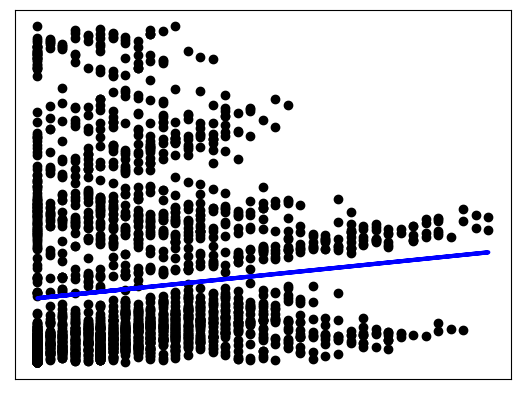

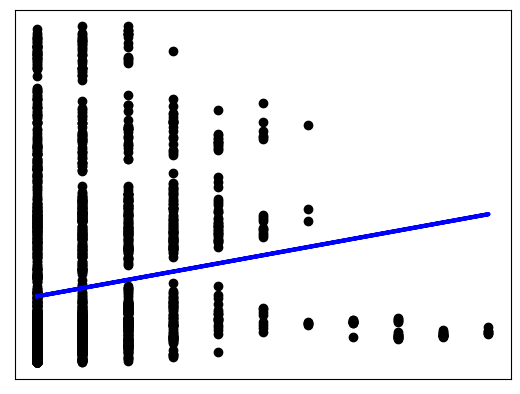

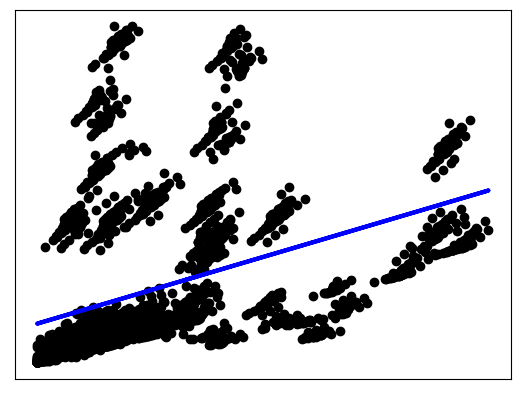

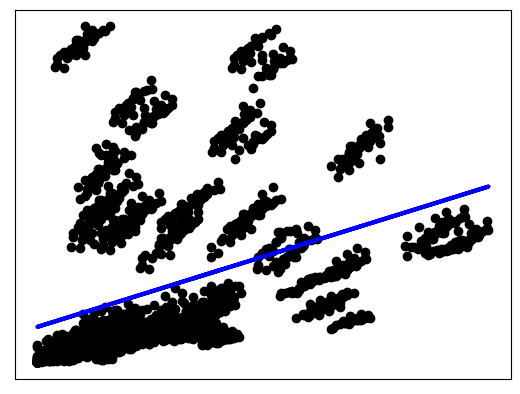

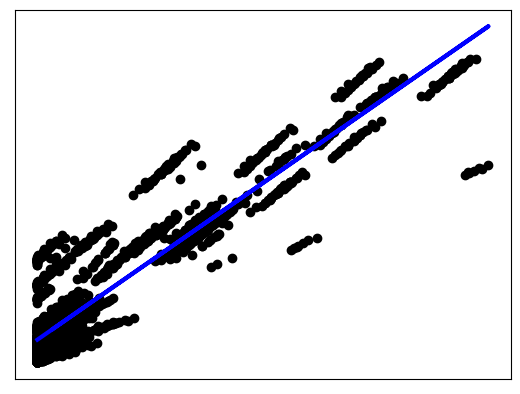

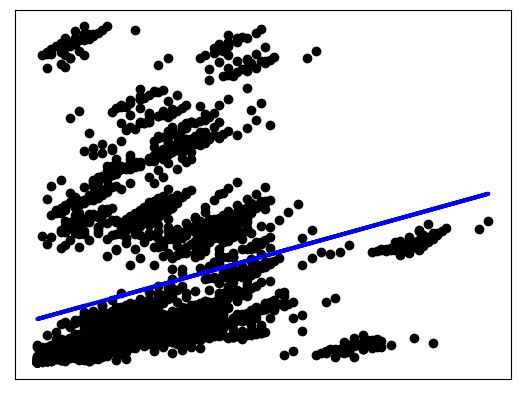

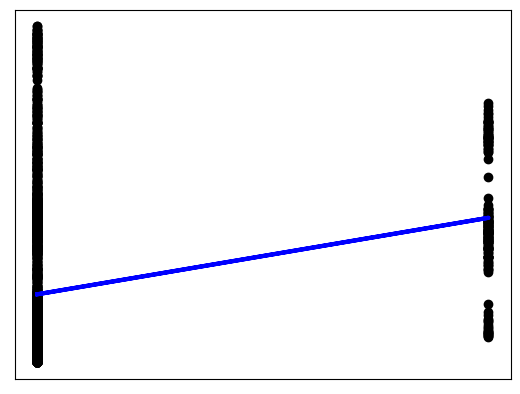

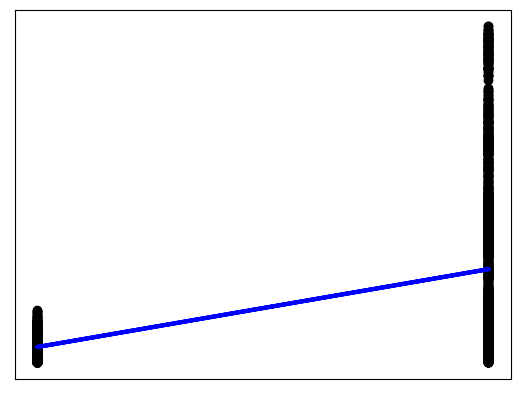

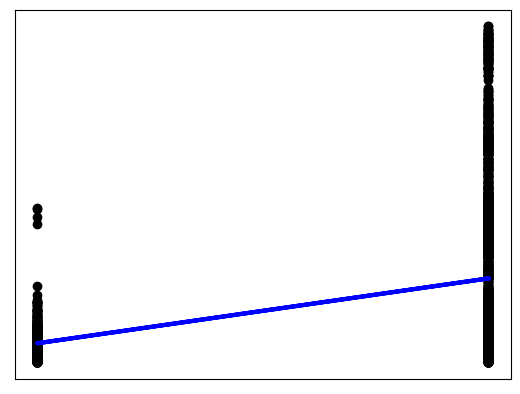

In [97]:
x = train[['Call Failure','Charge Amount','Seconds of Use', 'Freq. of use', 'Freq. of SMS', 'Distinct Called Numbers','Plan_post-paid', 'Status_active', 'Churn_yes']]
y = train[["Customer Value"]]

regr = linear_model.LinearRegression()
for key in x.keys():
    X_DF=train[[key]]
    x=X_DF
    regr.fit(x, y)

    plt.scatter(x, y, color='black')
    plt.plot(x, regr.predict(x), color='blue', linewidth=3)
    plt.xticks(())
    plt.yticks(())
    plt.show()